In [2]:
import pyspark
sc = pyspark.SparkContext('local[2]')

In [3]:
import pandas as pd, numpy as np

In [4]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("Tip").getOrCreate()

tip_df = spark.read.json('/Users/vijethapv/Downloads/Documents/INF553_DataMining/yelp_dataset/yelp_academic_dataset_tip.json')
reviews_df =spark.read.json('/Users/vijethapv/Downloads/Documents/INF553_DataMining/yelp_dataset/yelp_academic_dataset_review.json')
business_df =spark.read.json('/Users/vijethapv/Downloads/Documents/INF553_DataMining/yelp_dataset/yelp_academic_dataset_business.json')
users_df =spark.read.json('/Users/vijethapv/Downloads/Documents/INF553_DataMining/yelp_dataset/yelp_academic_dataset_user.json')
checkin_df =spark.read.json('/Users/vijethapv/Downloads/Documents/INF553_DataMining/yelp_dataset/yelp_academic_dataset_checkin.json')

rdd = tip_df.rdd.map(tuple)

rdd = rdd.map(lambda r: r[3])

In [5]:
tip_df.columns

['business_id', 'date', 'likes', 'text', 'user_id']

In [6]:
print (  'Tip count ' + str(tip_df.count())  + '\n' +
       'review count ' + str(reviews_df.count()) + '\n' +
       'business count'  + str(business_df.count()) + '\n'+
     'users count'  + str(users_df.count()) + '\n' +
       'checkin count' + str(checkin_df.count()) + '\n')

Tip count 1185348
review count 5996996
business count188593
users count1518169
checkin count157075



In [7]:
print (  'Tip col ' + str(tip_df.columns)  + '\n\n' +
       'review col ' + str(reviews_df.columns) + '\n\n' +
       'business col'  + str(business_df.columns) + '\n\n'+
     'users col'  + str(users_df.columns) + '\n\n' +
       'checkin col' + str(checkin_df.columns) + '\n\n')

Tip col ['business_id', 'date', 'likes', 'text', 'user_id']

review col ['business_id', 'cool', 'date', 'funny', 'review_id', 'stars', 'text', 'useful', 'user_id']

business col['address', 'attributes', 'business_id', 'categories', 'city', 'hours', 'is_open', 'latitude', 'longitude', 'name', 'neighborhood', 'postal_code', 'review_count', 'stars', 'state']

users col['average_stars', 'compliment_cool', 'compliment_cute', 'compliment_funny', 'compliment_hot', 'compliment_list', 'compliment_more', 'compliment_note', 'compliment_photos', 'compliment_plain', 'compliment_profile', 'compliment_writer', 'cool', 'elite', 'fans', 'friends', 'funny', 'name', 'review_count', 'useful', 'user_id', 'yelping_since']

checkin col['business_id', 'time']




In [8]:
tip_df.head(2)

[Row(business_id='tJRDll5yqpZwehenzE2cSg', date='2012-07-15', likes=0, text='Get here early enough to have dinner.', user_id='zcTZk7OG8ovAmh_fenH21g'),
 Row(business_id='2ThtBbeDqFkVi6LugUOcVA', date='2012-11-25', likes=0, text="Don't use them! Double charged my boyfriend and then would not respond afterwards!", user_id='M5n8mMFoeXjnJEV2gxyGGA')]

In [22]:
reviews_df.head(5)

[Row(business_id='iCQpiavjjPzJ5_3gPD5Ebg', cool=0, date='2011-02-25', funny=0, review_id='x7mDIiDB3jEiPGPHOmDzyw', stars=2, text="The pizza was okay. Not the best I've had. I prefer Biaggio's on Flamingo / Fort Apache. The chef there can make a MUCH better NY style pizza. The pizzeria @ Cosmo was over priced for the quality and lack of personality in the food. Biaggio's is a much better pick if youre going for italian - family owned, home made recipes, people that actually CARE if you like their food. You dont get that at a pizzeria in a casino. I dont care what you say...", useful=0, user_id='msQe1u7Z_XuqjGoqhB0J5g'),
 Row(business_id='pomGBqfbxcqPv14c3XH-ZQ', cool=0, date='2012-11-13', funny=0, review_id='dDl8zu1vWPdKGihJrwQbpw', stars=5, text='I love this place! My fiance And I go here atleast once a week. The portions are huge! Food is amazing. I love their carne asada. They have great lunch specials... Leticia is super nice and cares about what you think of her restaurant. You hav

In [9]:
business_df.head(2)

[Row(address='1314 44 Avenue NE', attributes=Row(AcceptsInsurance=None, AgesAllowed=None, Alcohol=None, Ambience=None, BYOB=None, BYOBCorkage=None, BestNights=None, BikeParking='False', BusinessAcceptsBitcoin=None, BusinessAcceptsCreditCards='True', BusinessParking="{'garage': False, 'street': True, 'validated': False, 'lot': False, 'valet': False}", ByAppointmentOnly=None, Caters=None, CoatCheck=None, Corkage=None, DietaryRestrictions=None, DogsAllowed=None, DriveThru=None, GoodForDancing=None, GoodForKids='True', GoodForMeal=None, HairSpecializesIn=None, HappyHour=None, HasTV='True', Music=None, NoiseLevel='average', Open24Hours=None, OutdoorSeating='False', RestaurantsAttire='casual', RestaurantsCounterService=None, RestaurantsDelivery='False', RestaurantsGoodForGroups='True', RestaurantsPriceRange2='2', RestaurantsReservations='True', RestaurantsTableService=None, RestaurantsTakeOut='True', Smoking=None, WheelchairAccessible=None, WiFi=None), business_id='Apn5Q_b6Nz61Tq4XzPdf9A', c

In [14]:
users_df.head(10)

[Row(average_stars=2.0, compliment_cool=0, compliment_cute=0, compliment_funny=0, compliment_hot=0, compliment_list=0, compliment_more=0, compliment_note=0, compliment_photos=0, compliment_plain=0, compliment_profile=0, compliment_writer=0, cool=0, elite='None', fans=0, friends='None', funny=0, name='Susan', review_count=1, useful=0, user_id='lzlZwIpuSWXEnNS91wxjHw', yelping_since='2015-09-28'),
 Row(average_stars=5.0, compliment_cool=0, compliment_cute=0, compliment_funny=0, compliment_hot=0, compliment_list=0, compliment_more=0, compliment_note=0, compliment_photos=0, compliment_plain=0, compliment_profile=0, compliment_writer=0, cool=0, elite='None', fans=0, friends='None', funny=0, name='Daipayan', review_count=2, useful=0, user_id='XvLBr-9smbI0m_a7dXtB7w', yelping_since='2015-09-05'),
 Row(average_stars=4.0, compliment_cool=0, compliment_cute=0, compliment_funny=0, compliment_hot=0, compliment_list=0, compliment_more=0, compliment_note=0, compliment_photos=0, compliment_plain=0, c

In [12]:
checkin_df.head(2)

[Row(business_id='7KPBkxAOEtb3QeIL9PEErg', time=Row(Fri-0=2, Fri-1=1, Fri-10=3, Fri-11=None, Fri-12=None, Fri-13=None, Fri-14=2, Fri-15=1, Fri-16=1, Fri-17=1, Fri-18=1, Fri-19=3, Fri-2=None, Fri-20=None, Fri-21=4, Fri-22=3, Fri-23=1, Fri-3=1, Fri-4=None, Fri-5=None, Fri-6=None, Fri-7=None, Fri-8=None, Fri-9=None, Mon-0=None, Mon-1=None, Mon-10=1, Mon-11=1, Mon-12=1, Mon-13=None, Mon-14=1, Mon-15=1, Mon-16=None, Mon-17=3, Mon-18=1, Mon-19=1, Mon-2=None, Mon-20=1, Mon-21=1, Mon-22=None, Mon-23=2, Mon-3=None, Mon-4=1, Mon-5=None, Mon-6=None, Mon-7=None, Mon-8=None, Mon-9=None, Sat-0=1, Sat-1=3, Sat-10=3, Sat-11=None, Sat-12=1, Sat-13=3, Sat-14=1, Sat-15=1, Sat-16=2, Sat-17=4, Sat-18=4, Sat-19=None, Sat-2=1, Sat-20=None, Sat-21=1, Sat-22=None, Sat-23=3, Sat-3=None, Sat-4=None, Sat-5=None, Sat-6=None, Sat-7=None, Sat-8=None, Sat-9=None, Sun-0=1, Sun-1=None, Sun-10=3, Sun-11=None, Sun-12=None, Sun-13=None, Sun-14=1, Sun-15=None, Sun-16=1, Sun-17=1, Sun-18=1, Sun-19=2, Sun-2=2, Sun-20=5, Sun-

In [13]:
tip_df=tip_df.toPandas()


Py4JJavaError: An error occurred while calling o31.collectToPython.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 0 in stage 20.0 failed 1 times, most recent failure: Lost task 0.0 in stage 20.0 (TID 128, localhost, executor driver): TaskResultLost (result lost from block manager)
Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.org$apache$spark$scheduler$DAGScheduler$$failJobAndIndependentStages(DAGScheduler.scala:1602)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$abortStage$1.apply(DAGScheduler.scala:1590)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$abortStage$1.apply(DAGScheduler.scala:1589)
	at scala.collection.mutable.ResizableArray$class.foreach(ResizableArray.scala:59)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:48)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:1589)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$handleTaskSetFailed$1.apply(DAGScheduler.scala:831)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$handleTaskSetFailed$1.apply(DAGScheduler.scala:831)
	at scala.Option.foreach(Option.scala:257)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:831)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:1823)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:1772)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:1761)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:48)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:642)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2034)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2055)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2074)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2099)
	at org.apache.spark.rdd.RDD$$anonfun$collect$1.apply(RDD.scala:939)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:363)
	at org.apache.spark.rdd.RDD.collect(RDD.scala:938)
	at org.apache.spark.sql.execution.SparkPlan.executeCollect(SparkPlan.scala:297)
	at org.apache.spark.sql.Dataset$$anonfun$collectToPython$1.apply(Dataset.scala:3195)
	at org.apache.spark.sql.Dataset$$anonfun$collectToPython$1.apply(Dataset.scala:3192)
	at org.apache.spark.sql.Dataset$$anonfun$52.apply(Dataset.scala:3254)
	at org.apache.spark.sql.execution.SQLExecution$.withNewExecutionId(SQLExecution.scala:77)
	at org.apache.spark.sql.Dataset.withAction(Dataset.scala:3253)
	at org.apache.spark.sql.Dataset.collectToPython(Dataset.scala:3192)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:238)
	at java.lang.Thread.run(Thread.java:748)


In [7]:
users_df = users_df.toPandas()

--- Logging error ---
ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:52886)
Traceback (most recent call last):
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-7-f7f1dfa4741b>", line 1, in <module>
    users_df = users_df.toPandas()
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/pyspark/sql/dataframe.py", line 1968, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/pyspark/sql/dataframe.py", line 466, in collect
    sock_info = self._jdf.collectToPython()
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/py4j/java_gateway.py", line 1257, in __call__
    answer, self.gateway_client, self.target_id, self.name)
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-pack

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:52886)
Traceback (most recent call last):
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-7-f7f1dfa4741b>", line 1, in <module>
    users_df = users_df.toPandas()
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/pyspark/sql/dataframe.py", line 1968, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/pyspark/sql/dataframe.py", line 466, in collect
    sock_info = self._jdf.collectToPython()
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/py4j/java_gateway.py", line 1257, in __call__
    answer, self.gateway_client, self.target_id, self.name)
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/pyspark/sql/utils

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:52886)
Traceback (most recent call last):
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-7-f7f1dfa4741b>", line 1, in <module>
    users_df = users_df.toPandas()
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/pyspark/sql/dataframe.py", line 1968, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/pyspark/sql/dataframe.py", line 466, in collect
    sock_info = self._jdf.collectToPython()
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/py4j/java_gateway.py", line 1257, in __call__
    answer, self.gateway_client, self.target_id, self.name)
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/pyspark/sql/utils

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:52886)
Traceback (most recent call last):
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-7-f7f1dfa4741b>", line 1, in <module>
    users_df = users_df.toPandas()
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/pyspark/sql/dataframe.py", line 1968, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/pyspark/sql/dataframe.py", line 466, in collect
    sock_info = self._jdf.collectToPython()
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/py4j/java_gateway.py", line 1257, in __call__
    answer, self.gateway_client, self.target_id, self.name)
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/pyspark/sql/utils

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:52886)
Traceback (most recent call last):
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-7-f7f1dfa4741b>", line 1, in <module>
    users_df = users_df.toPandas()
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/pyspark/sql/dataframe.py", line 1968, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/pyspark/sql/dataframe.py", line 466, in collect
    sock_info = self._jdf.collectToPython()
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/py4j/java_gateway.py", line 1257, in __call__
    answer, self.gateway_client, self.target_id, self.name)
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/pyspark/sql/utils

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:52886)
Traceback (most recent call last):
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-7-f7f1dfa4741b>", line 1, in <module>
    users_df = users_df.toPandas()
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/pyspark/sql/dataframe.py", line 1968, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/pyspark/sql/dataframe.py", line 466, in collect
    sock_info = self._jdf.collectToPython()
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/py4j/java_gateway.py", line 1257, in __call__
    answer, self.gateway_client, self.target_id, self.name)
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/pyspark/sql/utils

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:52886)
Traceback (most recent call last):
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-7-f7f1dfa4741b>", line 1, in <module>
    users_df = users_df.toPandas()
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/pyspark/sql/dataframe.py", line 1968, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/pyspark/sql/dataframe.py", line 466, in collect
    sock_info = self._jdf.collectToPython()
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/py4j/java_gateway.py", line 1257, in __call__
    answer, self.gateway_client, self.target_id, self.name)
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/pyspark/sql/utils

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:52886)
Traceback (most recent call last):
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-7-f7f1dfa4741b>", line 1, in <module>
    users_df = users_df.toPandas()
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/pyspark/sql/dataframe.py", line 1968, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/pyspark/sql/dataframe.py", line 466, in collect
    sock_info = self._jdf.collectToPython()
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/py4j/java_gateway.py", line 1257, in __call__
    answer, self.gateway_client, self.target_id, self.name)
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/pyspark/sql/utils

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:52886)
Traceback (most recent call last):
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-7-f7f1dfa4741b>", line 1, in <module>
    users_df = users_df.toPandas()
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/pyspark/sql/dataframe.py", line 1968, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/pyspark/sql/dataframe.py", line 466, in collect
    sock_info = self._jdf.collectToPython()
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/py4j/java_gateway.py", line 1257, in __call__
    answer, self.gateway_client, self.target_id, self.name)
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/pyspark/sql/utils

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:52886)
Traceback (most recent call last):
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-7-f7f1dfa4741b>", line 1, in <module>
    users_df = users_df.toPandas()
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/pyspark/sql/dataframe.py", line 1968, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/pyspark/sql/dataframe.py", line 466, in collect
    sock_info = self._jdf.collectToPython()
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/py4j/java_gateway.py", line 1257, in __call__
    answer, self.gateway_client, self.target_id, self.name)
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/pyspark/sql/utils

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:52886)
Traceback (most recent call last):
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-7-f7f1dfa4741b>", line 1, in <module>
    users_df = users_df.toPandas()
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/pyspark/sql/dataframe.py", line 1968, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/pyspark/sql/dataframe.py", line 466, in collect
    sock_info = self._jdf.collectToPython()
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/py4j/java_gateway.py", line 1257, in __call__
    answer, self.gateway_client, self.target_id, self.name)
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/pyspark/sql/utils

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:52886)
Traceback (most recent call last):
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-7-f7f1dfa4741b>", line 1, in <module>
    users_df = users_df.toPandas()
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/pyspark/sql/dataframe.py", line 1968, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/pyspark/sql/dataframe.py", line 466, in collect
    sock_info = self._jdf.collectToPython()
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/py4j/java_gateway.py", line 1257, in __call__
    answer, self.gateway_client, self.target_id, self.name)
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/pyspark/sql/utils

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:52886)
Traceback (most recent call last):
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-7-f7f1dfa4741b>", line 1, in <module>
    users_df = users_df.toPandas()
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/pyspark/sql/dataframe.py", line 1968, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/pyspark/sql/dataframe.py", line 466, in collect
    sock_info = self._jdf.collectToPython()
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/py4j/java_gateway.py", line 1257, in __call__
    answer, self.gateway_client, self.target_id, self.name)
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/pyspark/sql/utils

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:52886)
Traceback (most recent call last):
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-7-f7f1dfa4741b>", line 1, in <module>
    users_df = users_df.toPandas()
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/pyspark/sql/dataframe.py", line 1968, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/pyspark/sql/dataframe.py", line 466, in collect
    sock_info = self._jdf.collectToPython()
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/py4j/java_gateway.py", line 1257, in __call__
    answer, self.gateway_client, self.target_id, self.name)
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/pyspark/sql/utils

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:52886)
Traceback (most recent call last):
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-7-f7f1dfa4741b>", line 1, in <module>
    users_df = users_df.toPandas()
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/pyspark/sql/dataframe.py", line 1968, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/pyspark/sql/dataframe.py", line 466, in collect
    sock_info = self._jdf.collectToPython()
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/py4j/java_gateway.py", line 1257, in __call__
    answer, self.gateway_client, self.target_id, self.name)
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/pyspark/sql/utils

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:52886)
Traceback (most recent call last):
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-7-f7f1dfa4741b>", line 1, in <module>
    users_df = users_df.toPandas()
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/pyspark/sql/dataframe.py", line 1968, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/pyspark/sql/dataframe.py", line 466, in collect
    sock_info = self._jdf.collectToPython()
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/py4j/java_gateway.py", line 1257, in __call__
    answer, self.gateway_client, self.target_id, self.name)
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/pyspark/sql/utils

ERROR:root:Exception while sending command.
Traceback (most recent call last):
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-7-f7f1dfa4741b>", line 1, in <module>
    users_df = users_df.toPandas()
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/pyspark/sql/dataframe.py", line 1968, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/pyspark/sql/dataframe.py", line 466, in collect
    sock_info = self._jdf.collectToPython()
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/py4j/java_gateway.py", line 1257, in __call__
    answer, self.gateway_client, self.target_id, self.name)
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/pyspark/sql/utils.py", line 63, in deco
    return f(*a, **kw)
  File "/User

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:52886)
Traceback (most recent call last):
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-7-f7f1dfa4741b>", line 1, in <module>
    users_df = users_df.toPandas()
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/pyspark/sql/dataframe.py", line 1968, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/pyspark/sql/dataframe.py", line 466, in collect
    sock_info = self._jdf.collectToPython()
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/py4j/java_gateway.py", line 1257, in __call__
    answer, self.gateway_client, self.target_id, self.name)
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/pyspark/sql/utils

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:52886)
Traceback (most recent call last):
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-7-f7f1dfa4741b>", line 1, in <module>
    users_df = users_df.toPandas()
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/pyspark/sql/dataframe.py", line 1968, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/pyspark/sql/dataframe.py", line 466, in collect
    sock_info = self._jdf.collectToPython()
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/py4j/java_gateway.py", line 1257, in __call__
    answer, self.gateway_client, self.target_id, self.name)
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/pyspark/sql/utils

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:52886)
Traceback (most recent call last):
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-7-f7f1dfa4741b>", line 1, in <module>
    users_df = users_df.toPandas()
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/pyspark/sql/dataframe.py", line 1968, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/pyspark/sql/dataframe.py", line 466, in collect
    sock_info = self._jdf.collectToPython()
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/py4j/java_gateway.py", line 1257, in __call__
    answer, self.gateway_client, self.target_id, self.name)
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/pyspark/sql/utils

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:52886)
Traceback (most recent call last):
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-7-f7f1dfa4741b>", line 1, in <module>
    users_df = users_df.toPandas()
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/pyspark/sql/dataframe.py", line 1968, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/pyspark/sql/dataframe.py", line 466, in collect
    sock_info = self._jdf.collectToPython()
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/py4j/java_gateway.py", line 1257, in __call__
    answer, self.gateway_client, self.target_id, self.name)
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/pyspark/sql/utils

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:52886)
Traceback (most recent call last):
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-7-f7f1dfa4741b>", line 1, in <module>
    users_df = users_df.toPandas()
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/pyspark/sql/dataframe.py", line 1968, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/pyspark/sql/dataframe.py", line 466, in collect
    sock_info = self._jdf.collectToPython()
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/py4j/java_gateway.py", line 1257, in __call__
    answer, self.gateway_client, self.target_id, self.name)
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/pyspark/sql/utils

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:52886)
Traceback (most recent call last):
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-7-f7f1dfa4741b>", line 1, in <module>
    users_df = users_df.toPandas()
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/pyspark/sql/dataframe.py", line 1968, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/pyspark/sql/dataframe.py", line 466, in collect
    sock_info = self._jdf.collectToPython()
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/py4j/java_gateway.py", line 1257, in __call__
    answer, self.gateway_client, self.target_id, self.name)
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/pyspark/sql/utils

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:52886)
Traceback (most recent call last):
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-7-f7f1dfa4741b>", line 1, in <module>
    users_df = users_df.toPandas()
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/pyspark/sql/dataframe.py", line 1968, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/pyspark/sql/dataframe.py", line 466, in collect
    sock_info = self._jdf.collectToPython()
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/py4j/java_gateway.py", line 1257, in __call__
    answer, self.gateway_client, self.target_id, self.name)
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/pyspark/sql/utils

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:52886)
Traceback (most recent call last):
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-7-f7f1dfa4741b>", line 1, in <module>
    users_df = users_df.toPandas()
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/pyspark/sql/dataframe.py", line 1968, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/pyspark/sql/dataframe.py", line 466, in collect
    sock_info = self._jdf.collectToPython()
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/py4j/java_gateway.py", line 1257, in __call__
    answer, self.gateway_client, self.target_id, self.name)
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/pyspark/sql/utils

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:52886)
Traceback (most recent call last):
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-7-f7f1dfa4741b>", line 1, in <module>
    users_df = users_df.toPandas()
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/pyspark/sql/dataframe.py", line 1968, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/pyspark/sql/dataframe.py", line 466, in collect
    sock_info = self._jdf.collectToPython()
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/py4j/java_gateway.py", line 1257, in __call__
    answer, self.gateway_client, self.target_id, self.name)
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/pyspark/sql/utils

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:52886)
Traceback (most recent call last):
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-7-f7f1dfa4741b>", line 1, in <module>
    users_df = users_df.toPandas()
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/pyspark/sql/dataframe.py", line 1968, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/pyspark/sql/dataframe.py", line 466, in collect
    sock_info = self._jdf.collectToPython()
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/py4j/java_gateway.py", line 1257, in __call__
    answer, self.gateway_client, self.target_id, self.name)
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/pyspark/sql/utils

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:52886)
Traceback (most recent call last):
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-7-f7f1dfa4741b>", line 1, in <module>
    users_df = users_df.toPandas()
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/pyspark/sql/dataframe.py", line 1968, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/pyspark/sql/dataframe.py", line 466, in collect
    sock_info = self._jdf.collectToPython()
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/py4j/java_gateway.py", line 1257, in __call__
    answer, self.gateway_client, self.target_id, self.name)
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/pyspark/sql/utils

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:52886)
Traceback (most recent call last):
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-7-f7f1dfa4741b>", line 1, in <module>
    users_df = users_df.toPandas()
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/pyspark/sql/dataframe.py", line 1968, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/pyspark/sql/dataframe.py", line 466, in collect
    sock_info = self._jdf.collectToPython()
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/py4j/java_gateway.py", line 1257, in __call__
    answer, self.gateway_client, self.target_id, self.name)
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/pyspark/sql/utils

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:52886)
Traceback (most recent call last):
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-7-f7f1dfa4741b>", line 1, in <module>
    users_df = users_df.toPandas()
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/pyspark/sql/dataframe.py", line 1968, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/pyspark/sql/dataframe.py", line 466, in collect
    sock_info = self._jdf.collectToPython()
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/py4j/java_gateway.py", line 1257, in __call__
    answer, self.gateway_client, self.target_id, self.name)
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/pyspark/sql/utils

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:52886)
Traceback (most recent call last):
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-7-f7f1dfa4741b>", line 1, in <module>
    users_df = users_df.toPandas()
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/pyspark/sql/dataframe.py", line 1968, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/pyspark/sql/dataframe.py", line 466, in collect
    sock_info = self._jdf.collectToPython()
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/py4j/java_gateway.py", line 1257, in __call__
    answer, self.gateway_client, self.target_id, self.name)
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/pyspark/sql/utils

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:52886)
Traceback (most recent call last):
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-7-f7f1dfa4741b>", line 1, in <module>
    users_df = users_df.toPandas()
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/pyspark/sql/dataframe.py", line 1968, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/pyspark/sql/dataframe.py", line 466, in collect
    sock_info = self._jdf.collectToPython()
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/py4j/java_gateway.py", line 1257, in __call__
    answer, self.gateway_client, self.target_id, self.name)
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/pyspark/sql/utils

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:52886)
Traceback (most recent call last):
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-7-f7f1dfa4741b>", line 1, in <module>
    users_df = users_df.toPandas()
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/pyspark/sql/dataframe.py", line 1968, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/pyspark/sql/dataframe.py", line 466, in collect
    sock_info = self._jdf.collectToPython()
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/py4j/java_gateway.py", line 1257, in __call__
    answer, self.gateway_client, self.target_id, self.name)
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/pyspark/sql/utils

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:52886)
Traceback (most recent call last):
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-7-f7f1dfa4741b>", line 1, in <module>
    users_df = users_df.toPandas()
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/pyspark/sql/dataframe.py", line 1968, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/pyspark/sql/dataframe.py", line 466, in collect
    sock_info = self._jdf.collectToPython()
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/py4j/java_gateway.py", line 1257, in __call__
    answer, self.gateway_client, self.target_id, self.name)
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/pyspark/sql/utils

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:52886)
Traceback (most recent call last):
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-7-f7f1dfa4741b>", line 1, in <module>
    users_df = users_df.toPandas()
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/pyspark/sql/dataframe.py", line 1968, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/pyspark/sql/dataframe.py", line 466, in collect
    sock_info = self._jdf.collectToPython()
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/py4j/java_gateway.py", line 1257, in __call__
    answer, self.gateway_client, self.target_id, self.name)
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/pyspark/sql/utils

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:52886)
Traceback (most recent call last):
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-7-f7f1dfa4741b>", line 1, in <module>
    users_df = users_df.toPandas()
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/pyspark/sql/dataframe.py", line 1968, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/pyspark/sql/dataframe.py", line 466, in collect
    sock_info = self._jdf.collectToPython()
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/py4j/java_gateway.py", line 1257, in __call__
    answer, self.gateway_client, self.target_id, self.name)
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/pyspark/sql/utils

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:52886)
Traceback (most recent call last):
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-7-f7f1dfa4741b>", line 1, in <module>
    users_df = users_df.toPandas()
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/pyspark/sql/dataframe.py", line 1968, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/pyspark/sql/dataframe.py", line 466, in collect
    sock_info = self._jdf.collectToPython()
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/py4j/java_gateway.py", line 1257, in __call__
    answer, self.gateway_client, self.target_id, self.name)
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/pyspark/sql/utils

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:52886)
Traceback (most recent call last):
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-7-f7f1dfa4741b>", line 1, in <module>
    users_df = users_df.toPandas()
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/pyspark/sql/dataframe.py", line 1968, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/pyspark/sql/dataframe.py", line 466, in collect
    sock_info = self._jdf.collectToPython()
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/py4j/java_gateway.py", line 1257, in __call__
    answer, self.gateway_client, self.target_id, self.name)
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/pyspark/sql/utils

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:52886)
Traceback (most recent call last):
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-7-f7f1dfa4741b>", line 1, in <module>
    users_df = users_df.toPandas()
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/pyspark/sql/dataframe.py", line 1968, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/pyspark/sql/dataframe.py", line 466, in collect
    sock_info = self._jdf.collectToPython()
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/py4j/java_gateway.py", line 1257, in __call__
    answer, self.gateway_client, self.target_id, self.name)
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/pyspark/sql/utils

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:52886)
Traceback (most recent call last):
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-7-f7f1dfa4741b>", line 1, in <module>
    users_df = users_df.toPandas()
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/pyspark/sql/dataframe.py", line 1968, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/pyspark/sql/dataframe.py", line 466, in collect
    sock_info = self._jdf.collectToPython()
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/py4j/java_gateway.py", line 1257, in __call__
    answer, self.gateway_client, self.target_id, self.name)
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/pyspark/sql/utils

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:52886)
Traceback (most recent call last):
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-7-f7f1dfa4741b>", line 1, in <module>
    users_df = users_df.toPandas()
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/pyspark/sql/dataframe.py", line 1968, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/pyspark/sql/dataframe.py", line 466, in collect
    sock_info = self._jdf.collectToPython()
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/py4j/java_gateway.py", line 1257, in __call__
    answer, self.gateway_client, self.target_id, self.name)
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/pyspark/sql/utils

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:52886)
Traceback (most recent call last):
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-7-f7f1dfa4741b>", line 1, in <module>
    users_df = users_df.toPandas()
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/pyspark/sql/dataframe.py", line 1968, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/pyspark/sql/dataframe.py", line 466, in collect
    sock_info = self._jdf.collectToPython()
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/py4j/java_gateway.py", line 1257, in __call__
    answer, self.gateway_client, self.target_id, self.name)
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/pyspark/sql/utils

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:52886)
Traceback (most recent call last):
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-7-f7f1dfa4741b>", line 1, in <module>
    users_df = users_df.toPandas()
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/pyspark/sql/dataframe.py", line 1968, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/pyspark/sql/dataframe.py", line 466, in collect
    sock_info = self._jdf.collectToPython()
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/py4j/java_gateway.py", line 1257, in __call__
    answer, self.gateway_client, self.target_id, self.name)
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/pyspark/sql/utils

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:52886)
Traceback (most recent call last):
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-7-f7f1dfa4741b>", line 1, in <module>
    users_df = users_df.toPandas()
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/pyspark/sql/dataframe.py", line 1968, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/pyspark/sql/dataframe.py", line 466, in collect
    sock_info = self._jdf.collectToPython()
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/py4j/java_gateway.py", line 1257, in __call__
    answer, self.gateway_client, self.target_id, self.name)
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/pyspark/sql/utils

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:52886)
Traceback (most recent call last):
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-7-f7f1dfa4741b>", line 1, in <module>
    users_df = users_df.toPandas()
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/pyspark/sql/dataframe.py", line 1968, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/pyspark/sql/dataframe.py", line 466, in collect
    sock_info = self._jdf.collectToPython()
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/py4j/java_gateway.py", line 1257, in __call__
    answer, self.gateway_client, self.target_id, self.name)
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/pyspark/sql/utils

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:52886)
Traceback (most recent call last):
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-7-f7f1dfa4741b>", line 1, in <module>
    users_df = users_df.toPandas()
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/pyspark/sql/dataframe.py", line 1968, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/pyspark/sql/dataframe.py", line 466, in collect
    sock_info = self._jdf.collectToPython()
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/py4j/java_gateway.py", line 1257, in __call__
    answer, self.gateway_client, self.target_id, self.name)
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/pyspark/sql/utils

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:52886)
Traceback (most recent call last):
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-7-f7f1dfa4741b>", line 1, in <module>
    users_df = users_df.toPandas()
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/pyspark/sql/dataframe.py", line 1968, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/pyspark/sql/dataframe.py", line 466, in collect
    sock_info = self._jdf.collectToPython()
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/py4j/java_gateway.py", line 1257, in __call__
    answer, self.gateway_client, self.target_id, self.name)
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/pyspark/sql/utils

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:52886)
Traceback (most recent call last):
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-7-f7f1dfa4741b>", line 1, in <module>
    users_df = users_df.toPandas()
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/pyspark/sql/dataframe.py", line 1968, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/pyspark/sql/dataframe.py", line 466, in collect
    sock_info = self._jdf.collectToPython()
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/py4j/java_gateway.py", line 1257, in __call__
    answer, self.gateway_client, self.target_id, self.name)
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/pyspark/sql/utils

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:52886)
Traceback (most recent call last):
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-7-f7f1dfa4741b>", line 1, in <module>
    users_df = users_df.toPandas()
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/pyspark/sql/dataframe.py", line 1968, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/pyspark/sql/dataframe.py", line 466, in collect
    sock_info = self._jdf.collectToPython()
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/py4j/java_gateway.py", line 1257, in __call__
    answer, self.gateway_client, self.target_id, self.name)
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/pyspark/sql/utils

ERROR:py4j.java_gateway:An error occurred while trying to connect to the Java server (127.0.0.1:52886)
Traceback (most recent call last):
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-7-f7f1dfa4741b>", line 1, in <module>
    users_df = users_df.toPandas()
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/pyspark/sql/dataframe.py", line 1968, in toPandas
    pdf = pd.DataFrame.from_records(self.collect(), columns=self.columns)
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/pyspark/sql/dataframe.py", line 466, in collect
    sock_info = self._jdf.collectToPython()
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/py4j/java_gateway.py", line 1257, in __call__
    answer, self.gateway_client, self.target_id, self.name)
  File "/Users/vijethapv/anaconda3/lib/python3.6/site-packages/pyspark/sql/utils

Py4JNetworkError: An error occurred while trying to connect to the Java server (127.0.0.1:52886)

In [ ]:
type(users_df)

In [ ]:
 tip_df.merge(users_df, left_on='user_id', right_on='user_id', how='left')

In [ ]:
result =tip_df.groupby(['user_id'])['business_id'].agg('count')

In [ ]:
result.nlargest(50)

In [ ]:
result_df =result.reset_index()

In [ ]:
res_top50 = list(result_df.sort_values(by='business_id' ,ascending=False)[:50]['user_id'])


In [ ]:
# users_df.filter($("user_id").isin )

In [6]:
bus_pdf = business_df.toPandas()

Py4JJavaError: An error occurred while calling o39.collectToPython.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 0 in stage 5.0 failed 1 times, most recent failure: Lost task 0.0 in stage 5.0 (TID 59, localhost, executor driver): TaskResultLost (result lost from block manager)
Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.org$apache$spark$scheduler$DAGScheduler$$failJobAndIndependentStages(DAGScheduler.scala:1602)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$abortStage$1.apply(DAGScheduler.scala:1590)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$abortStage$1.apply(DAGScheduler.scala:1589)
	at scala.collection.mutable.ResizableArray$class.foreach(ResizableArray.scala:59)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:48)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:1589)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$handleTaskSetFailed$1.apply(DAGScheduler.scala:831)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$handleTaskSetFailed$1.apply(DAGScheduler.scala:831)
	at scala.Option.foreach(Option.scala:257)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:831)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:1823)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:1772)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:1761)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:48)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:642)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2034)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2055)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2074)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2099)
	at org.apache.spark.rdd.RDD$$anonfun$collect$1.apply(RDD.scala:939)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:363)
	at org.apache.spark.rdd.RDD.collect(RDD.scala:938)
	at org.apache.spark.sql.execution.SparkPlan.executeCollect(SparkPlan.scala:297)
	at org.apache.spark.sql.Dataset$$anonfun$collectToPython$1.apply(Dataset.scala:3195)
	at org.apache.spark.sql.Dataset$$anonfun$collectToPython$1.apply(Dataset.scala:3192)
	at org.apache.spark.sql.Dataset$$anonfun$52.apply(Dataset.scala:3254)
	at org.apache.spark.sql.execution.SQLExecution$.withNewExecutionId(SQLExecution.scala:77)
	at org.apache.spark.sql.Dataset.withAction(Dataset.scala:3253)
	at org.apache.spark.sql.Dataset.collectToPython(Dataset.scala:3192)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:238)
	at java.lang.Thread.run(Thread.java:748)


In [28]:
bus_pdf.groupby(['categories'])['business_id'].agg('count')

categories
3D Printing, Local Services, Shopping, Customized Merchandise                                                                                                                                                                                                                                                             1
3D Printing, Printing Services, Graphic Design, Local Services, Professional Services                                                                                                                                                                                                                                     1
ATV Rentals/Tours, Active Life                                                                                                                                                                                                                                                                                            4
ATV Rentals/Tours, Active Life, Boating, 

In [1]:
bus_pdf['categories'].unique

NameError: name 'bus_pdf' is not defined

In [4]:
pandas_users_df = pd.read_json('/Users/vijethapv/Downloads/Documents/INF553_DataMining/yelp_dataset/yelp_academic_dataset_user.json',orient='columns')

OSError: [Errno 22] Invalid argument

In [ ]:
business_df['attributes']

In [14]:
tip_df.head(50)

[Row(business_id='tJRDll5yqpZwehenzE2cSg', date='2012-07-15', likes=0, text='Get here early enough to have dinner.', user_id='zcTZk7OG8ovAmh_fenH21g'),
 Row(business_id='2ThtBbeDqFkVi6LugUOcVA', date='2012-11-25', likes=0, text="Don't use them! Double charged my boyfriend and then would not respond afterwards!", user_id='M5n8mMFoeXjnJEV2gxyGGA'),
 Row(business_id='jH19V2I9fIslnNhDzPmdkA', date='2015-08-12', likes=0, text='Great breakfast large portions and friendly waitress. I highly recommend it', user_id='ZcLKXikTHYOnYt5VYRO5sg'),
 Row(business_id='dAa0hB2yrnHzVmsCkN4YvQ', date='2014-06-20', likes=0, text='Nice place. Great staff.  A fixture in the township forever', user_id='oaYhjqBbh18ZhU0bpyzSuw'),
 Row(business_id='dAa0hB2yrnHzVmsCkN4YvQ', date='2016-10-12', likes=0, text='Happy hour 5-7 Monday - Friday', user_id='ulQ8Nyj7jCUR8M83SUMoRQ'),
 Row(business_id='ESzO3Av0b1_TzKOiqzbQYQ', date='2017-01-28', likes=0, text='Parking is a premium, keep circling, you will eventually find a g

In [21]:
reviews_df.columns

['business_id',
 'cool',
 'date',
 'funny',
 'review_id',
 'stars',
 'text',
 'useful',
 'user_id']

In [1]:
business_df.columns

NameError: name 'business_df' is not defined

In [23]:
reviews_df.registerTempTable("reviews")
business_df.registerTempTable("business")



In [34]:
from pyspark.sql import SQLContext
sqlContext = SQLContext(spark.sparkContext)
sqlContext.sql(
  "select business.business_id, business.categories ,business.postal_code , reviews.text " +
  "from business inner join reviews " +
  "where business.business_id = reviews.business_id").show()

Py4JJavaError: An error occurred while calling o484.showString.
: java.util.concurrent.TimeoutException: Futures timed out after [300 seconds]
	at scala.concurrent.impl.Promise$DefaultPromise.ready(Promise.scala:219)
	at scala.concurrent.impl.Promise$DefaultPromise.result(Promise.scala:223)
	at org.apache.spark.util.ThreadUtils$.awaitResult(ThreadUtils.scala:201)
	at org.apache.spark.sql.execution.exchange.BroadcastExchangeExec.doExecuteBroadcast(BroadcastExchangeExec.scala:136)
	at org.apache.spark.sql.execution.InputAdapter.doExecuteBroadcast(WholeStageCodegenExec.scala:367)
	at org.apache.spark.sql.execution.SparkPlan$$anonfun$executeBroadcast$1.apply(SparkPlan.scala:144)
	at org.apache.spark.sql.execution.SparkPlan$$anonfun$executeBroadcast$1.apply(SparkPlan.scala:140)
	at org.apache.spark.sql.execution.SparkPlan$$anonfun$executeQuery$1.apply(SparkPlan.scala:155)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.sql.execution.SparkPlan.executeQuery(SparkPlan.scala:152)
	at org.apache.spark.sql.execution.SparkPlan.executeBroadcast(SparkPlan.scala:140)
	at org.apache.spark.sql.execution.joins.BroadcastHashJoinExec.prepareBroadcast(BroadcastHashJoinExec.scala:135)
	at org.apache.spark.sql.execution.joins.BroadcastHashJoinExec.codegenInner(BroadcastHashJoinExec.scala:232)
	at org.apache.spark.sql.execution.joins.BroadcastHashJoinExec.doConsume(BroadcastHashJoinExec.scala:102)
	at org.apache.spark.sql.execution.CodegenSupport$class.consume(WholeStageCodegenExec.scala:181)
	at org.apache.spark.sql.execution.ProjectExec.consume(basicPhysicalOperators.scala:35)
	at org.apache.spark.sql.execution.ProjectExec.doConsume(basicPhysicalOperators.scala:65)
	at org.apache.spark.sql.execution.CodegenSupport$class.consume(WholeStageCodegenExec.scala:181)
	at org.apache.spark.sql.execution.FilterExec.consume(basicPhysicalOperators.scala:85)
	at org.apache.spark.sql.execution.FilterExec.doConsume(basicPhysicalOperators.scala:206)
	at org.apache.spark.sql.execution.CodegenSupport$class.consume(WholeStageCodegenExec.scala:181)
	at org.apache.spark.sql.execution.FileSourceScanExec.consume(DataSourceScanExec.scala:158)
	at org.apache.spark.sql.execution.ColumnarBatchScan$class.produceRows(ColumnarBatchScan.scala:166)
	at org.apache.spark.sql.execution.ColumnarBatchScan$class.doProduce(ColumnarBatchScan.scala:80)
	at org.apache.spark.sql.execution.FileSourceScanExec.doProduce(DataSourceScanExec.scala:158)
	at org.apache.spark.sql.execution.CodegenSupport$$anonfun$produce$1.apply(WholeStageCodegenExec.scala:88)
	at org.apache.spark.sql.execution.CodegenSupport$$anonfun$produce$1.apply(WholeStageCodegenExec.scala:83)
	at org.apache.spark.sql.execution.SparkPlan$$anonfun$executeQuery$1.apply(SparkPlan.scala:155)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.sql.execution.SparkPlan.executeQuery(SparkPlan.scala:152)
	at org.apache.spark.sql.execution.CodegenSupport$class.produce(WholeStageCodegenExec.scala:83)
	at org.apache.spark.sql.execution.FileSourceScanExec.produce(DataSourceScanExec.scala:158)
	at org.apache.spark.sql.execution.FilterExec.doProduce(basicPhysicalOperators.scala:125)
	at org.apache.spark.sql.execution.CodegenSupport$$anonfun$produce$1.apply(WholeStageCodegenExec.scala:88)
	at org.apache.spark.sql.execution.CodegenSupport$$anonfun$produce$1.apply(WholeStageCodegenExec.scala:83)
	at org.apache.spark.sql.execution.SparkPlan$$anonfun$executeQuery$1.apply(SparkPlan.scala:155)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.sql.execution.SparkPlan.executeQuery(SparkPlan.scala:152)
	at org.apache.spark.sql.execution.CodegenSupport$class.produce(WholeStageCodegenExec.scala:83)
	at org.apache.spark.sql.execution.FilterExec.produce(basicPhysicalOperators.scala:85)
	at org.apache.spark.sql.execution.ProjectExec.doProduce(basicPhysicalOperators.scala:45)
	at org.apache.spark.sql.execution.CodegenSupport$$anonfun$produce$1.apply(WholeStageCodegenExec.scala:88)
	at org.apache.spark.sql.execution.CodegenSupport$$anonfun$produce$1.apply(WholeStageCodegenExec.scala:83)
	at org.apache.spark.sql.execution.SparkPlan$$anonfun$executeQuery$1.apply(SparkPlan.scala:155)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.sql.execution.SparkPlan.executeQuery(SparkPlan.scala:152)
	at org.apache.spark.sql.execution.CodegenSupport$class.produce(WholeStageCodegenExec.scala:83)
	at org.apache.spark.sql.execution.ProjectExec.produce(basicPhysicalOperators.scala:35)
	at org.apache.spark.sql.execution.joins.BroadcastHashJoinExec.doProduce(BroadcastHashJoinExec.scala:97)
	at org.apache.spark.sql.execution.CodegenSupport$$anonfun$produce$1.apply(WholeStageCodegenExec.scala:88)
	at org.apache.spark.sql.execution.CodegenSupport$$anonfun$produce$1.apply(WholeStageCodegenExec.scala:83)
	at org.apache.spark.sql.execution.SparkPlan$$anonfun$executeQuery$1.apply(SparkPlan.scala:155)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.sql.execution.SparkPlan.executeQuery(SparkPlan.scala:152)
	at org.apache.spark.sql.execution.CodegenSupport$class.produce(WholeStageCodegenExec.scala:83)
	at org.apache.spark.sql.execution.joins.BroadcastHashJoinExec.produce(BroadcastHashJoinExec.scala:39)
	at org.apache.spark.sql.execution.ProjectExec.doProduce(basicPhysicalOperators.scala:45)
	at org.apache.spark.sql.execution.CodegenSupport$$anonfun$produce$1.apply(WholeStageCodegenExec.scala:88)
	at org.apache.spark.sql.execution.CodegenSupport$$anonfun$produce$1.apply(WholeStageCodegenExec.scala:83)
	at org.apache.spark.sql.execution.SparkPlan$$anonfun$executeQuery$1.apply(SparkPlan.scala:155)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.sql.execution.SparkPlan.executeQuery(SparkPlan.scala:152)
	at org.apache.spark.sql.execution.CodegenSupport$class.produce(WholeStageCodegenExec.scala:83)
	at org.apache.spark.sql.execution.ProjectExec.produce(basicPhysicalOperators.scala:35)
	at org.apache.spark.sql.execution.BaseLimitExec$class.doProduce(limit.scala:70)
	at org.apache.spark.sql.execution.LocalLimitExec.doProduce(limit.scala:97)
	at org.apache.spark.sql.execution.CodegenSupport$$anonfun$produce$1.apply(WholeStageCodegenExec.scala:88)
	at org.apache.spark.sql.execution.CodegenSupport$$anonfun$produce$1.apply(WholeStageCodegenExec.scala:83)
	at org.apache.spark.sql.execution.SparkPlan$$anonfun$executeQuery$1.apply(SparkPlan.scala:155)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.sql.execution.SparkPlan.executeQuery(SparkPlan.scala:152)
	at org.apache.spark.sql.execution.CodegenSupport$class.produce(WholeStageCodegenExec.scala:83)
	at org.apache.spark.sql.execution.LocalLimitExec.produce(limit.scala:97)
	at org.apache.spark.sql.execution.WholeStageCodegenExec.doCodeGen(WholeStageCodegenExec.scala:524)
	at org.apache.spark.sql.execution.WholeStageCodegenExec.doExecute(WholeStageCodegenExec.scala:576)
	at org.apache.spark.sql.execution.SparkPlan$$anonfun$execute$1.apply(SparkPlan.scala:131)
	at org.apache.spark.sql.execution.SparkPlan$$anonfun$execute$1.apply(SparkPlan.scala:127)
	at org.apache.spark.sql.execution.SparkPlan$$anonfun$executeQuery$1.apply(SparkPlan.scala:155)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.sql.execution.SparkPlan.executeQuery(SparkPlan.scala:152)
	at org.apache.spark.sql.execution.SparkPlan.execute(SparkPlan.scala:127)
	at org.apache.spark.sql.execution.SparkPlan.getByteArrayRdd(SparkPlan.scala:247)
	at org.apache.spark.sql.execution.SparkPlan.executeTake(SparkPlan.scala:337)
	at org.apache.spark.sql.execution.CollectLimitExec.executeCollect(limit.scala:38)
	at org.apache.spark.sql.Dataset.org$apache$spark$sql$Dataset$$collectFromPlan(Dataset.scala:3273)
	at org.apache.spark.sql.Dataset$$anonfun$head$1.apply(Dataset.scala:2484)
	at org.apache.spark.sql.Dataset$$anonfun$head$1.apply(Dataset.scala:2484)
	at org.apache.spark.sql.Dataset$$anonfun$52.apply(Dataset.scala:3254)
	at org.apache.spark.sql.execution.SQLExecution$.withNewExecutionId(SQLExecution.scala:77)
	at org.apache.spark.sql.Dataset.withAction(Dataset.scala:3253)
	at org.apache.spark.sql.Dataset.head(Dataset.scala:2484)
	at org.apache.spark.sql.Dataset.take(Dataset.scala:2698)
	at org.apache.spark.sql.Dataset.showString(Dataset.scala:254)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:238)
	at java.lang.Thread.run(Thread.java:748)


In [36]:
import networkx as nx

In [37]:
g = nx.Graph()
g.add_nodes_from([1,2,3])

In [38]:
g.add_edge(1,2)

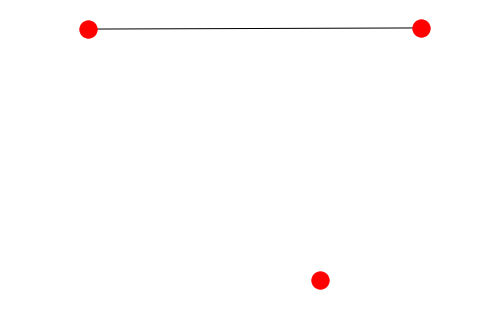

In [40]:
%matplotlib inline
import matplotlib.pyplot as plt
nx.draw(g)

In [42]:
from wordcloud import WordCloud

In [43]:
text = "The pizza was okay. Not the best I've had. I prefer Biaggio's on Flamingo / Fort Apache. The chef there can make a MUCH better NY style pizza. The pizzeria @ Cosmo was over priced for the quality and lack of personality in the food. Biaggio's is a much better pick if youre going for italian - family owned, home made recipes, people that actually CARE if you like their food. You dont get that at a pizzeria in a casino. I dont care what you say..."

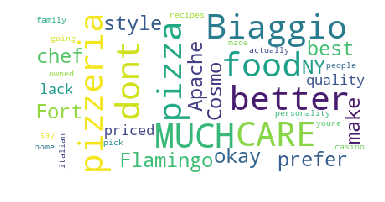

In [45]:
wordcloud = WordCloud().generate(text)
import matplotlib.pyplot as plt
wordcloud = WordCloud(background_color="white",max_words=len(text),max_font_size=40, relative_scaling=.8).generate(text)
plt.figure()
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [90]:
users_df.head(60)

[Row(average_stars=2.0, compliment_cool=0, compliment_cute=0, compliment_funny=0, compliment_hot=0, compliment_list=0, compliment_more=0, compliment_note=0, compliment_photos=0, compliment_plain=0, compliment_profile=0, compliment_writer=0, cool=0, elite='None', fans=0, friends='None', funny=0, name='Susan', review_count=1, useful=0, user_id='lzlZwIpuSWXEnNS91wxjHw', yelping_since='2015-09-28'),
 Row(average_stars=5.0, compliment_cool=0, compliment_cute=0, compliment_funny=0, compliment_hot=0, compliment_list=0, compliment_more=0, compliment_note=0, compliment_photos=0, compliment_plain=0, compliment_profile=0, compliment_writer=0, cool=0, elite='None', fans=0, friends='None', funny=0, name='Daipayan', review_count=2, useful=0, user_id='XvLBr-9smbI0m_a7dXtB7w', yelping_since='2015-09-05'),
 Row(average_stars=4.0, compliment_cool=0, compliment_cute=0, compliment_funny=0, compliment_hot=0, compliment_list=0, compliment_more=0, compliment_note=0, compliment_photos=0, compliment_plain=0, c

In [22]:
users_friends_list = users_df['user_id','friends']

In [62]:
# for row in users_friends_list.loc[users_friends_list.friends.isnull(), 'friends'].index:
#     users_friends_list.at[row, 'friends'] = []
from pyspark.sql.functions import col
# users_with_friends = users_friends_list.where(col("friends") is not 'None')
users_with_friends = users_friends_list.filter(users_friends_list.friends!='None')
# users_with_friends =users_friends_list.na.drop(subset=["friends"])

In [211]:
users_with_friends.count()

879891

In [92]:
from pyspark.sql.functions import udf
from pyspark.sql.types import IntegerType
# users_friends_list.fillna({'friends':[]})
slen = udf(lambda s: len(s.split(",")), IntegerType())

users_friends_list_2 = users_with_friends.withColumn("friends_cnt", slen(users_with_friends.friends))


In [93]:
users_friends_list_2.head(10)

[Row(user_id='B3xwUPXMlCb7_5IEDlq4Uw', friends='YwaKGmRNnSa3R3N4Hf9jLw, NDjDKV7IWeqS_kvdlNS9zw, eArNPOynylyfcXxQqXag-g, 7NAKCkRMw8Qwke3BWOgE8A, syA7uYoDjohc7gWBWaEZmw, bvOicnFbku4B1mK12fIP6Q, wGcbKPOJYpnAB-Oi86_AtQ, ysvphNWLP0ZkXPOLrXw7Tg, gPnezUoB9AcxE_qeBR_Dsw, edJEj384w4_09sivk6VblA, rS91MRNTRGikL4_acEfdNQ, bMSePKFYwjslP18fFmeHnA, EOIrXIWKMFcdn_7CPBacDQ, SZTscGkXeemMSGz1hN369Q, 1H1Cn5utCE5jxI5BXfpxgw, qqx5YwBV8OlHlpU2yPFPnA, ZxYgNB6Nuj6R50gXewLw5w, OcpxS8U7evLWyfw1K2pwng, 3Ua7O424qU24smW7QcmFbw, sa4wUK8fbCLqiUq4rC0h9A, 4F0BijndBJDS0hQEmqfm_A, 44IPobgBDnZuFJoGD3LrUQ, ismGKdAF86dKAqMnrA9ehw, alUUlKTAKiNh-32E7k22eQ, RYkinABdGJ2t0zIEvyMtkg, Y9oNrUa4jWjAVVgDeEf43w, 9clBVewke08oNI85nZWqEg, R47JPwtASV1o6OOAkeyNPw, KcwRRhds7XQxYeWxVp4Azw, F4oZPZacaqhlXUDQl4xBHQ, Uwt1-D5elADZQcrMc1vrUw, y11itP1bR1vOPQO_AWtDdg, vpqgTC91x4LdXWtwlkMNXA, L4uxvvEuc146Qo8wRipp6Q, shYLM4g_3C5LU4Jb7KW0eQ, PmTaA51J5EItUIST-PGCgA, EEwZgv8HU54yu-uFQ8RLEw, 5DuZbOCtUECYoWX7HPfMoA, NsuHPkhUQDht1_JBBu1gtQ, lUTdfcu2YMGuYuvB

In [94]:
users_friends_list_2.count()

879891

In [69]:
users_friends_list_2.columns

['user_id', 'friends', 'friends_cnt']

In [72]:
users_friends_list_2.filter(users_friends_list_2.friends_cnt >30).count()

781304

In [73]:
users_friends_list_2.filter(users_friends_list_2.friends_cnt >100).count()

668635

In [74]:
users_friends_list_2.filter(users_friends_list_2.friends_cnt >200).count()

596130

In [83]:
from pyspark.sql.functions import col, avg
a=users_friends_list_2.select(avg(users_friends_list_2.friends_cnt))

In [86]:
a.head(1)

[Row(avg(friends_cnt)=1767.8480448146418)]

In [89]:
users_friends_list_2.filter(users_friends_list_2.friends_cnt >1767).count()

238668

In [95]:
business_df.columns

['address',
 'attributes',
 'business_id',
 'categories',
 'city',
 'hours',
 'is_open',
 'latitude',
 'longitude',
 'name',
 'neighborhood',
 'postal_code',
 'review_count',
 'stars',
 'state']

[Row((city = Henderson)=False),
 Row((city = Henderson)=True),
 Row((city = Henderson)=False),
 Row((city = Henderson)=False),
 Row((city = Henderson)=False)]

In [104]:
business_df.count()

188593

In [107]:
a=business_df.where(business_df.city=='Henderson')

In [108]:
a.head(5)

[Row(address='', attributes=Row(AcceptsInsurance=None, AgesAllowed=None, Alcohol='none', Ambience=None, BYOB=None, BYOBCorkage=None, BestNights=None, BikeParking='False', BusinessAcceptsBitcoin=None, BusinessAcceptsCreditCards='True', BusinessParking="{'garage': False, 'street': True, 'validated': False, 'lot': True, 'valet': False}", ByAppointmentOnly=None, Caters='True', CoatCheck=None, Corkage=None, DietaryRestrictions=None, DogsAllowed='True', DriveThru='False', GoodForDancing=None, GoodForKids='True', GoodForMeal="{'dessert': False, 'latenight': False, 'lunch': False, 'dinner': False, 'breakfast': False, 'brunch': False}", HairSpecializesIn=None, HappyHour=None, HasTV='False', Music=None, NoiseLevel=None, Open24Hours=None, OutdoorSeating='True', RestaurantsAttire='casual', RestaurantsCounterService=None, RestaurantsDelivery='False', RestaurantsGoodForGroups='True', RestaurantsPriceRange2='2', RestaurantsReservations='False', RestaurantsTableService='False', RestaurantsTakeOut='Tru

In [113]:
a.count()

0

In [119]:
distinct_cities=business_df.select("city").distinct()

In [120]:
distinct_cities.count()

1111

In [144]:
# myDataFrame.filter(col("columnName").startsWith("PREFIX"))
distinct_cities.where(col('city').like("C%") ).show()

+------------+
|        city|
+------------+
| Main Street|
|      Olivos|
|Las Vegas Nv|
|      Austin|
|   City Bell|
|    Bellagio|
|  Villa Rosa|
|   Glamorgan|
|       Clark|
|     Canning|
|     Sevilla|
|        Onda|
|   Suite 120|
+------------+



In [146]:
distinct_states=business_df.select("state").distinct()

In [149]:
count_business_in_Cali=business_df.where(business_df.state=='CA')

In [150]:
count_business_in_Cali.count()

8

In [148]:
distinct_states.where(col('state').like("CA") ).show()

+-----+
|state|
+-----+
|   CA|
+-----+



In [194]:
group_business_state=business_df.groupBy('state').count()

In [189]:
group_business_state.orderBy('count',ascending=0).show()

+-----+-----+
|state|count|
+-----+-----+
|   AZ|56495|
|   NV|35688|
|   ON|32393|
|   NC|14359|
|   OH|13664|
|   PA|10966|
|   QC| 8756|
|   AB| 7670|
|   WI| 5042|
|   IL| 1937|
|   SC|  770|
|  NYK|  163|
|   NI|  134|
|   IN|  101|
|   OR|   72|
|   BY|   60|
|   ST|   45|
|   CO|   43|
|    C|   34|
|   HE|   32|
+-----+-----+
only showing top 20 rows



In [160]:
group_business_by_city=business_df.groupBy('city').count()
group_business_by_city.orderBy('count',ascending=0).show()

+---------------+-----+
|           city|count|
+---------------+-----+
|      Las Vegas|28865|
|        Phoenix|18633|
|        Toronto|18233|
|      Charlotte| 9204|
|     Scottsdale| 8822|
|        Calgary| 7384|
|     Pittsburgh| 6804|
|           Mesa| 6239|
|       Montréal| 6045|
|      Henderson| 4815|
|          Tempe| 4492|
|       Chandler| 4272|
|        Madison| 3509|
|      Cleveland| 3506|
|       Glendale| 3469|
|        Gilbert| 3397|
|    Mississauga| 2954|
|         Peoria| 1868|
|        Markham| 1699|
|North Las Vegas| 1508|
+---------------+-----+
only showing top 20 rows



In [190]:
from pyspark.sql.functions import collect_set
group_business_list_of_cities_in_state=business_df.groupBy('state').agg(
    collect_set("city"))

In [193]:
group_business_list_of_cities_in_state.limit(5).toPandas().head()

group_business_list_of_cities_in_state.filter(group_business_list_of_cities_in_state.state=='AZ').show()

+-----+--------------------+
|state|   collect_set(city)|
+-----+--------------------+
|   AZ|[Peoria, AZ, Mesa...|
+-----+--------------------+



In [183]:
import pandas as pd 
pd.set_option('display.width', 1000)

In [196]:
businesses_in_arizona = business_df.where(business_df.state=='AZ')

In [200]:
businesses_in_arizona.columns

['address',
 'attributes',
 'business_id',
 'categories',
 'city',
 'hours',
 'is_open',
 'latitude',
 'longitude',
 'name',
 'neighborhood',
 'postal_code',
 'review_count',
 'stars',
 'state']

In [ ]:
businesses_in_arizona

In [201]:
reviews_df.count()

5996996

In [208]:
# df1.join(df2, df1("col1") === df2("col1"), "left_outer")
business_to_review_df= businesses_in_arizona.join(reviews_df,businesses_in_arizona.business_id==reviews_df.business_id,"left_outer")

Considering the users who have reviewed businesses in Arizona , we may further narrow this down to users who have provided atleast 10 or > reviews for businesses in Arizona , to say that they've stayed there.

In [213]:
users_from_arizona = business_to_review_df.select("user_id").distinct() # assumption that these users are from Arizona

In [218]:
users_from_arizona.count()

475865

In [222]:
users_from_arizona_more_details = users_from_arizona.join(users_df, users_from_arizona.user_id==users_df.user_id, "inner")

In [224]:
users_from_arizona_more_details.count()

475865

In [225]:
users_from_arizona_more_details_with_friends = users_from_arizona_more_details.filter(users_from_arizona_more_details.friends!='None')

In [232]:
users_from_arizona_more_details_with_friends.count()

DataFrame[average_stars: double, compliment_cool: bigint, compliment_cute: bigint, compliment_funny: bigint, compliment_hot: bigint, compliment_list: bigint, compliment_more: bigint, compliment_note: bigint, compliment_photos: bigint, compliment_plain: bigint, compliment_profile: bigint, compliment_writer: bigint, cool: bigint, elite: string, fans: bigint, friends: string, funny: bigint, name: string, review_count: bigint, useful: bigint, yelping_since: string]

In [233]:
users_from_arizona_more_details_with_friends.columns

['user_id',
 'average_stars',
 'compliment_cool',
 'compliment_cute',
 'compliment_funny',
 'compliment_hot',
 'compliment_list',
 'compliment_more',
 'compliment_note',
 'compliment_photos',
 'compliment_plain',
 'compliment_profile',
 'compliment_writer',
 'cool',
 'elite',
 'fans',
 'friends',
 'funny',
 'name',
 'review_count',
 'useful',
 'user_id',
 'yelping_since']

In [228]:
users_in_arizona_friends_list = users_from_arizona_more_details_with_friends['user_id','friends']

AnalysisException: "Reference 'user_id' is ambiguous, could be: user_id, user_id.;"

In [223]:
users_from_arizona_friends_lists = users_from_arizona_more_details_with_friends.withColumn("friends_cnt", slen(users_from_arizona_more_details_with_friends.friends))

NameError: name 'users_from_arizona_more_details_with_friends' is not defined